# *1.Importing necessary packages*

In [138]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston


# *2.Loading dataset*

In [139]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names,index=None)

In [140]:
Y = boston.target

In [141]:

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [142]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


# *3. Visualizing the distribution of each feature*

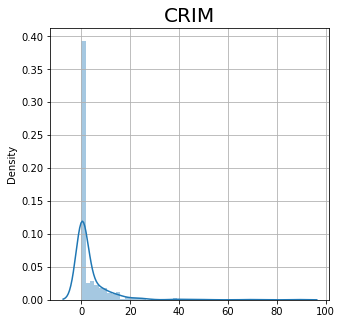

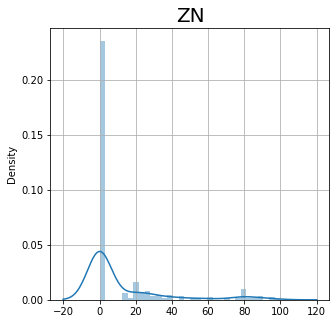

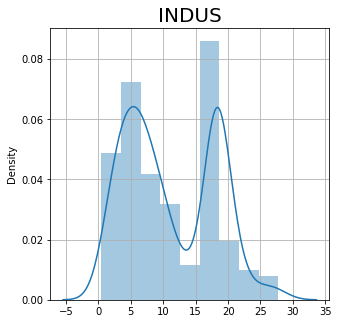

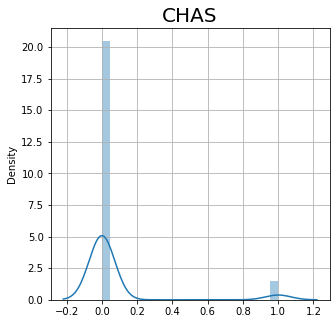

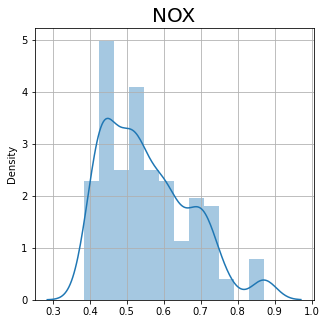

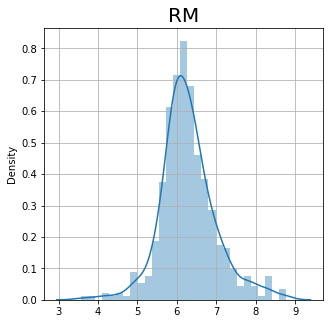

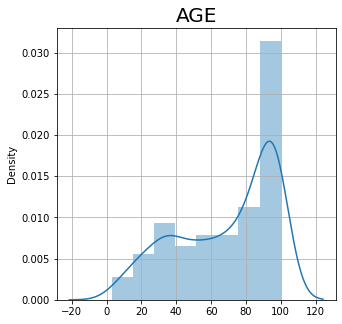

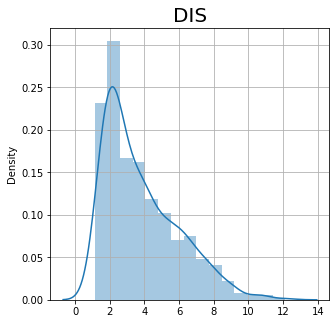

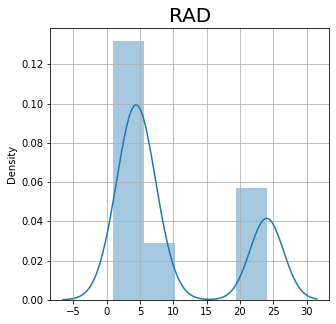

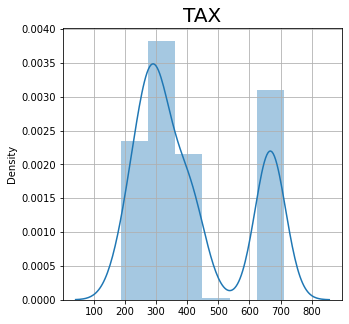

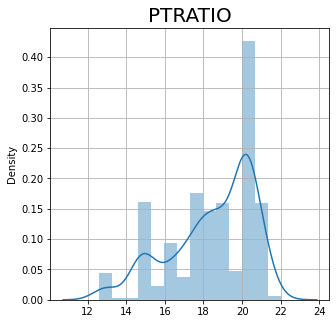

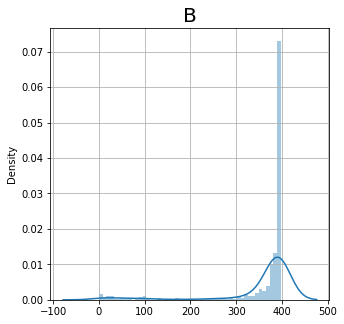

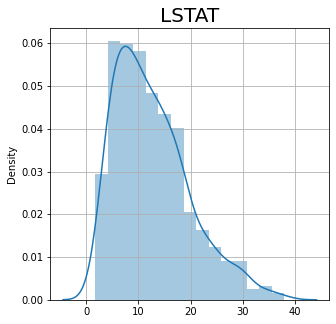

In [143]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
for col in bos.columns:
  plt.figure(figsize=(5,5))
  sns.distplot(bos[col].values)
  plt.grid(b=True)
  plt.title(col,fontsize=20)

# <b>Conclusion</b>: Most of the features are skewed and have outliers ans shown in the plots. In the next step we will try to remove this skewness and using <b>Log-Transformation technique..''

# *4.Checking the skewness of each features using Log-Transformation technique*

In [144]:
from scipy import stats
from scipy.special import boxcox1p
before_skewness = []
after_skewness=[]
for col in bos.columns:
  before_skewness.append(bos[col].skew())
  #print(pd.Series(np.log(bos[col]).skew()))
  after_skewness.append(np.log(bos[col]).skew())

skew_table = pd.DataFrame({'features':bos.columns,'before_skew':before_skewness, 'after_skew':after_skewness},index=None)
skew_table  
  

,features,before_skew,after_skew
0,CRIM,5.223149,0.405934
1,ZN,2.225666,NaN
2,INDUS,0.295022,-0.643126
3,CHAS,3.405904,NaN
4,NOX,0.729308,0.357780
5,RM,0.403612,-0.294663
6,AGE,-0.598963,-1.675655
7,DIS,1.011781,0.152730
8,RAD,1.004815,0.286617
9,TAX,0.669956,0.330557


# <b>Conclusion</b>: As we can see few of the features doesnot improbve upon transformation hence we will use the original version of feature which does not improve upon transformation.

In [145]:
bos.ZN.replace(0,0.00001,inplace=True) # We need to replace the 0 values in the feature as log transformation will give NaN 
bos.CHAS.replace(0,0.00001,inplace=True)

In [146]:
from scipy import stats
from scipy.special import boxcox1p
before_skewness = []
after_skewness=[]
for col in bos.columns:
  before_skewness.append(bos[col].skew())
  #print(pd.Series(np.log(bos[col]).skew()))
  after_skewness.append(np.log(bos[col]).skew())

skew_table = pd.DataFrame({'features':bos.columns,'before_skew':before_skewness, 'after_skew':after_skewness},index=None)
skew_table  
  

,features,before_skew,after_skew
0,CRIM,5.223149,0.405934
1,ZN,2.225667,1.077004
2,INDUS,0.295022,-0.643126
3,CHAS,3.405904,3.405904
4,NOX,0.729308,0.357780
5,RM,0.403612,-0.294663
6,AGE,-0.598963,-1.675655
7,DIS,1.011781,0.152730
8,RAD,1.004815,0.286617
9,TAX,0.669956,0.330557


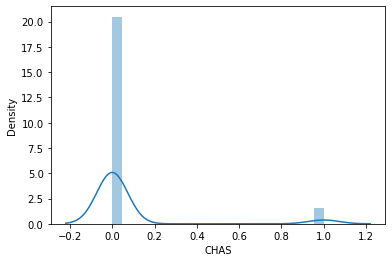

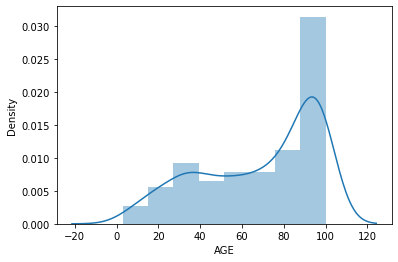

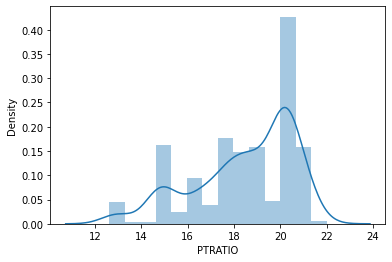

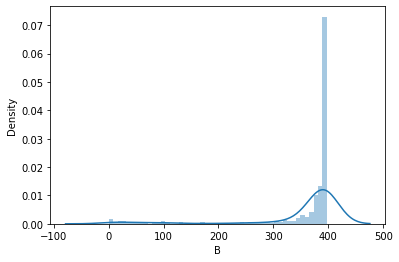

In [147]:
#3 6 10 11
for col in ['CHAS','AGE','PTRATIO','B']:
  sns.distplot(bos[col])
  plt.show()


# *Conclusion: We have to drop B feature as most of the points are outlier in this.*

In [148]:
bos_new = bos.copy()
skewed_col_list = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT']
for col in skewed_col_list:
  bos_new[col] = np.log(bos[col])

In [149]:
for col in bos_new.columns:
  print(bos_new[col].skew())

0.4059344988496048
1.0770036334308317
-0.6431257054895457
3.405904172058746
0.3577796083043403
-0.29466341189508455
-0.5989626398812962
0.15273013181129969
0.2866170964452744
0.330556653549998
-0.8023249268537809
-2.8903737121414492
-0.3202323581479543


# *5. After analyzing the heatmap below I have decided to drop ['B','CRIM','DIS','ZN'] as they highly interdependent on other features.*

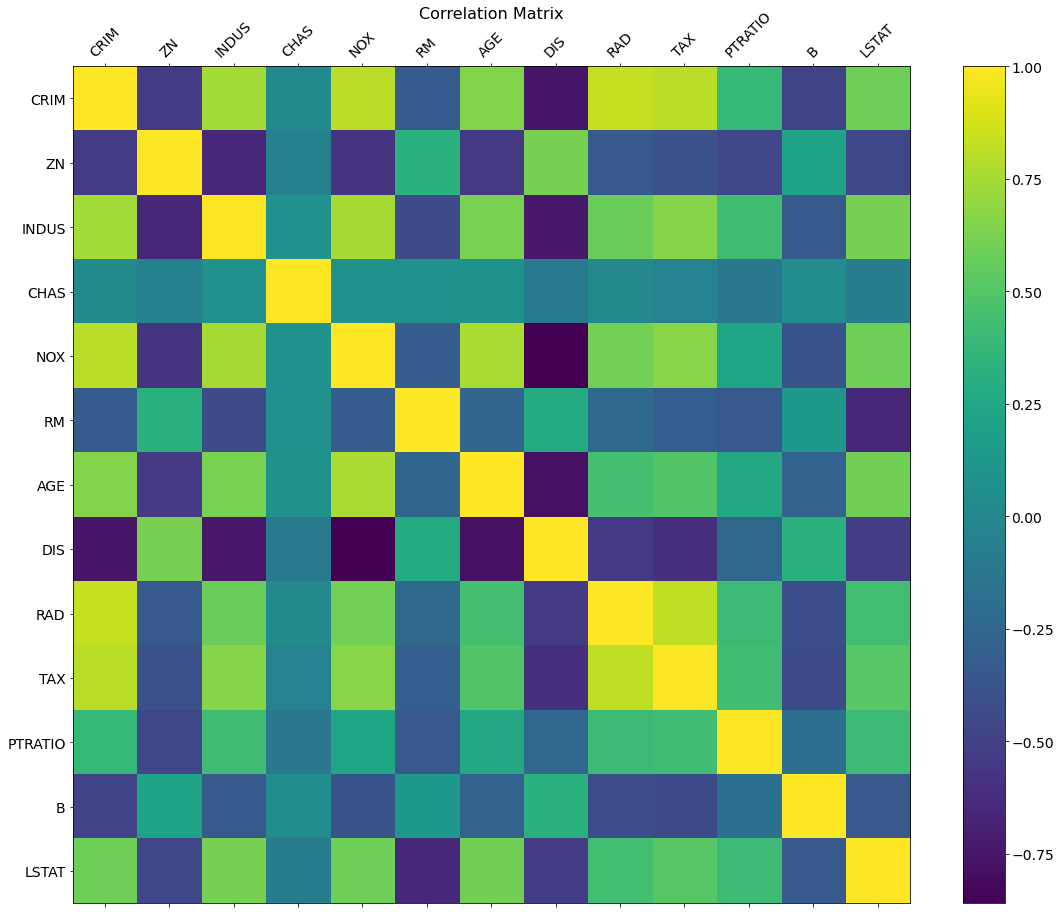

In [150]:
f = plt.figure(figsize=(19, 15))
plt.matshow(bos_new.corr(), fignum=f.number)
plt.xticks(range(bos_new.shape[1]), bos_new.columns, fontsize=14, rotation=45)
plt.yticks(range(bos_new.shape[1]), bos_new.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [151]:
bos_new.drop('B',axis=1,inplace=True)
bos_new.drop('CRIM',axis=1,inplace=True)
bos_new.drop('DIS',axis=1,inplace=True)
bos_new.drop('ZN',axis=1,inplace=True)


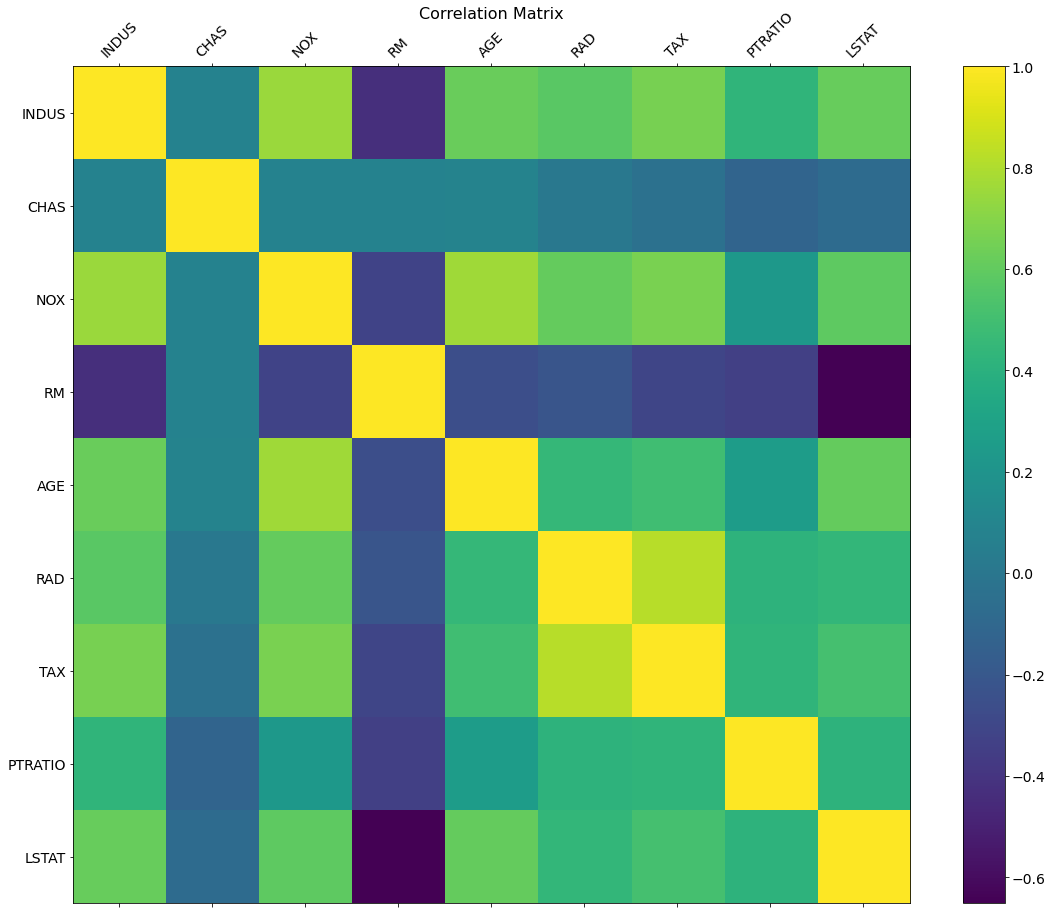

In [152]:
f = plt.figure(figsize=(19, 15))
plt.matshow(bos_new.corr(), fignum=f.number)
plt.xticks(range(bos_new.shape[1]), bos_new.columns, fontsize=14, rotation=45)
plt.yticks(range(bos_new.shape[1]), bos_new.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# *Conclusion: Now it looks better.*

# ***6. Training and prediction***

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_bos=scaler.fit_transform(bos_new.values)



In [154]:
std_bos

array([[-1.70434352, -0.27259857, -0.04904019, ..., -0.60873889,
        -1.45900038, -1.27526026],
       [-0.26323902, -0.27259857, -0.7309423 , ..., -1.11741215,
        -0.30309415, -0.26371064],
       [-0.26323902, -0.27259857, -0.7309423 , ..., -1.11741215,
        -0.30309415, -1.62785808],
       ...,
       [ 0.41079194, -0.27259857,  0.26408576, ..., -0.81301372,
         1.17646583, -1.06793936],
       [ 0.41079194, -0.27259857,  0.26408576, ..., -0.81301372,
         1.17646583, -0.83665988],
       [ 0.41079194, -0.27259857,  0.26408576, ..., -0.81301372,
         1.17646583, -0.51080901]])

In [155]:
from sklearn.model_selection import train_test_split
X_tr,X_test,Y_tr,Y_test = train_test_split(std_bos,Y,test_size=0.25,random_state=42)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_tr,Y_tr,test_size=0.25,random_state=42)


In [156]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( )
LR.fit(X_train,Y_train)
print('CV data  R^2 score is {0}'.format(LR.score(X_cv,Y_cv)))


CV data  R^2 score is 0.7068092978253522


In [157]:
print('R^2 score for test data is : ',LR.score(X_test,Y_test))

R^2 score for test data is :  0.7121410273792347


# ***Conclusion: So we have a model which can fit almost 71.21% of the data correctly. *** 